<a href="https://colab.research.google.com/github/angelmorales2621-gif/Investigaci-n-de-operaciones-/blob/main/Grafos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

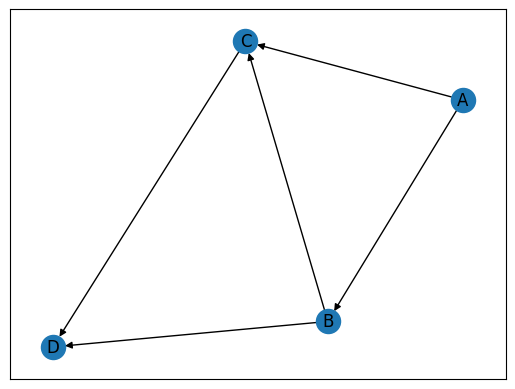

In [22]:
import networkx as nx #libreria que permite crear grafos
G= nx.DiGraph() #grafica dirigida
G.add_edge("A","B",capacity=1)
G.add_edge("B","D",capacity=1)
G.add_edge("A","C",capacity=1)
G.add_edge("B","C",capacity=1)
G.add_edge("C","D",capacity=1) #graficar los nodos con flujo
nx.draw_networkx(G)

In [23]:
G #tipo de dato

In [24]:
nx.number_of_nodes(G) #numero de nodos

4

In [25]:
nx.number_of_edges(G) #numero de aristas

5

In [26]:
list(G.nodes) #nodos en forma de lista

['A', 'B', 'D', 'C']

In [27]:
list(G.edges) #direccion del flujo

[('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'C'), ('C', 'D')]

In [32]:
G.remove_node("A" )
G.remove_nodes_from("spam")
list(G.nodes) #eliminar un nodo

['B', 'D', 'C']

In [35]:
list(G.neighbors("B" )) #vecinos de algún nodo

['D', 'C']